In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
# 魔法指令，直接展示图，Jupyter notebook特有
%matplotlib inline

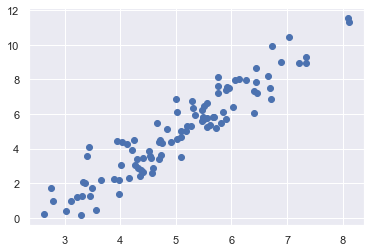

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn;seaborn.set()
# 均值
mean = [5, 5]
cov = [[1, 2], [2, 5]]
X = np.random.multivariate_normal(mean, cov, 100)
X.shape
plt.scatter(X[:,0], X[:,1],)
plt.show()

[  0  80 160 240 320 400 480 560 640]


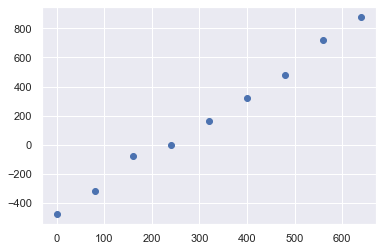

In [16]:
# 针对数据做线性拟合
line = cv2.fitLine(X,distType=cv2.DIST_L1,param=0,reps=0.01,aeps=0.01)
k = line[1] / line[0]
b = line[3] - k * line[2]

img = np.zeros((800,800,3))

points = []
for i in range(9):
    points.append([i,int(k*i+b)])
points = np.array(points) * 80
print(points[:,0])
plt.scatter(points[:,0], points[:,1])
plt.show()

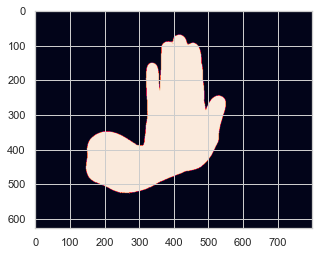

In [17]:
img = cv2.imread("hand.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,binary = cv2.threshold(gray,20,255,cv2.THRESH_BINARY)
plt.imshow(binary)

(3, 1, 2) (272.5, 528.0) 0.5001000165939331
(3, 1, 2) (392.0, 90.0) 9.999999747378752e-05
(3, 1, 2) (314.0, 293.0) 247.42080688476562


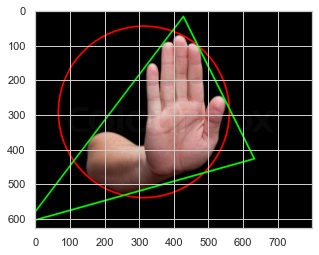

In [29]:
contours,_=cv2.findContours(binary,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_SIMPLE)
img2 = cv2.imread("hand.jpg")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

for contour in contours:
    _,triangle = cv2.minEnclosingTriangle(contour)
    circle,radius = cv2.minEnclosingCircle(contour)
    print(triangle.shape,circle,radius)
    if radius>100:
        cv2.circle(img2,center=(int(circle[0]),int(circle[1])),radius=int(radius),color=(255,0,0),thickness=3)
        cv2.line(img2,
                 (int(triangle[0][0][0]),int(triangle[0][0][1])),
                 (int(triangle[1][0][0]),int(triangle[1][0][1])),
                 color=(0,255,0),thickness=3)
        cv2.line(img2,
                 (int(triangle[1][0][0]),int(triangle[1][0][1])),
                 (int(triangle[2][0][0]),int(triangle[2][0][1])),
                 color=(0,255,0),thickness=3)
        cv2.line(img2,
                 (int(triangle[0][0][0]),int(triangle[0][0][1])),
                 (int(triangle[2][0][0]),int(triangle[2][0][1])),
                 color=(0,255,0),thickness=3)

plt.imshow(img2)